In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv("data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

## Data Dictionary

|Variable              | Description                                                                                 |
|:---------------------|:--------------------------------------------------------------------------------------------|
|CAMIS                 | This is an unique identifier for the entity (restaurant)                                    |
|DBA                   | This field represents the name (doing business as) of the entity (restaurant)               |
|BORO                  | Borough in which the entity (restaurant) is located. NOTE: There may be discrepancies between zip code and listed boro due to differences in an establishment's mailing address and physical location              |
|BUILDING              | This field represents the building number for the entity (restaurant)                       | 
|STREET                | This field represents the street name at which the entity (restaurant) is located.          |
|ZIPCODE               | Zip code as per the address of the entity (restaurant)                                      |
|PHONE                 | Phone Number                                                                                |
|CUISINE DESCRIPTION   | This field describes the entity (restaurant) cuisine.                                       |
|INSPECTION DATE       | This field represents the date of inspection                                                |
|ACTION                | This field represents the actions that is associated with each restaurant inspection.       |
|VIOLATION CODE        | This field represents the violation codes that is associated with each restaurant inspection| 
|VIOLATION DESCRIPTION | This field is the description that corresponds to the violation codes                       |
|CRITICAL FLAG         | This indicates if Violation is critical or not.                                             |
|SCORE                 | Total Score for a particular inspection. If there was adjudication a judge may reduce the total points for the inspection and this field will have the update amount.                                          |
|GRADE                 | N = Not Yet Graded, Z = Grade Pending, P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure, A, B, C|
|GRADE DATE            | The date when the current grade was issued to the entity (restaurant)                       |
|RECORD DATE           | The date when the extract was run to produce this data set                                  |
|INSPECTION TYPE       | The type of inspection. A combination of the program and inspection type.                   |

In [54]:
data.head(2)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41035487,PADDY DUGGANS PUB,QUEENS,4714,GREENPOINT AVENUE,11104.0,7184157399,"Bottled beverages, including water, sodas, jui...",2016-04-21,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12.0,A,2016-04-21,2017-12-26,Cycle Inspection / Initial Inspection
1,50007212,THE LOFT STEAKHOUSE,BROOKLYN,1306,40TH ST,11218.0,7184755600,Jewish/Kosher,2015-09-02,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,29.0,NaN,NaT,2017-12-26,Cycle Inspection / Initial Inspection


# Data Cleaning

In [59]:
data.columns = data.columns.str.replace(" ", "_").str.lower()

In [8]:
data["inspection_date"] = pd.to_datetime(data["inspection_date"])
data["grade_date"] = pd.to_datetime(data["grade_date"])
data["record_date"] = pd.to_datetime(data["record_date"])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392173 entries, 0 to 392172
Data columns (total 18 columns):
camis                    392173 non-null int64
dba                      391791 non-null object
boro                     392173 non-null object
building                 392040 non-null object
street                   392169 non-null object
zipcode                  392169 non-null float64
phone                    392157 non-null object
cuisine_description      392173 non-null object
inspection_date          392173 non-null datetime64[ns]
action                   391096 non-null object
violation_code           386074 non-null object
violation_description    385385 non-null object
critical_flag            392173 non-null object
score                    370263 non-null float64
grade                    193977 non-null object
grade_date               191999 non-null datetime64[ns]
record_date              392173 non-null datetime64[ns]
inspection_type          391096 non-null object


In [64]:
data.grade.value_counts()

A                 153539
B                  27091
C                   6869
Z                   2866
Not Yet Graded      1983
P                   1629
Name: grade, dtype: int64

In [65]:
data.grade=data.grade.str.replace("Not Yet Graded", "N")

In [66]:
data.grade.value_counts()

A    153539
B     27091
C      6869
Z      2866
N      1983
P      1629
Name: grade, dtype: int64

In [69]:
data[data.dba.isnull()]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type
712,50072544,NaN,MANHATTAN,3371,BROADWAY,10031.0,2126818898,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
1646,50072843,NaN,QUEENS,13545,ROOSEVELT AVE,11354.0,7188018289,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
1973,50071653,NaN,QUEENS,21613,LINDEN BLVD,11411.0,3477594438,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
5357,50071543,NaN,BROOKLYN,590,FULTON ST,11217.0,2128107398,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
6203,50062723,NaN,MANHATTAN,236,LAFAYETTE ST,10012.0,7325460878,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
6907,50066278,NaN,BRONX,3716,WHITE PLAINS RD,10467.0,7185778603,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
9988,50072021,NaN,MANHATTAN,1482,1ST AVE,10075.0,2125325003,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
11379,50072375,NaN,BROOKLYN,176,N 9TH ST,11211.0,7183021499,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
12096,50072121,NaN,MANHATTAN,190,7TH AVE,10011.0,2123667267,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
13067,50065193,NaN,BROOKLYN,1401,ROCKAWAY PKWY,11236.0,3474468376,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN


In [71]:
data = data[data.dba.notnull()]

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391791 entries, 0 to 392172
Data columns (total 18 columns):
camis                    391791 non-null int64
dba                      391791 non-null object
boro                     391791 non-null object
building                 391659 non-null object
street                   391788 non-null object
zipcode                  391788 non-null float64
phone                    391779 non-null object
cuisine_description      391791 non-null object
inspection_date          391791 non-null datetime64[ns]
action                   391096 non-null object
violation_code           386074 non-null object
violation_description    385385 non-null object
critical_flag            391791 non-null object
score                    370263 non-null float64
grade                    193977 non-null object
grade_date               191999 non-null datetime64[ns]
record_date              391791 non-null datetime64[ns]
inspection_type          391096 non-null object


In [73]:
data[data.zipcode.isnull()]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type
41850,50071237,CHAP A NOSH OF BROOKLYN,Missing,NaN,NaN,NaN,7186371082,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
332544,50066320,JUICE & JAVA NYC,Missing,NaN,NaN,NaN,3052990903,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN
378594,50064340,OPTIMISTIC CAFE,Missing,NaN,NaN,NaN,3473719175,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN


In [74]:
data = data[data.zipcode.notnull()]

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391788 entries, 0 to 392172
Data columns (total 18 columns):
camis                    391788 non-null int64
dba                      391788 non-null object
boro                     391788 non-null object
building                 391659 non-null object
street                   391788 non-null object
zipcode                  391788 non-null float64
phone                    391776 non-null object
cuisine_description      391788 non-null object
inspection_date          391788 non-null datetime64[ns]
action                   391096 non-null object
violation_code           386074 non-null object
violation_description    385385 non-null object
critical_flag            391788 non-null object
score                    370263 non-null float64
grade                    193977 non-null object
grade_date               191999 non-null datetime64[ns]
record_date              391788 non-null datetime64[ns]
inspection_type          391096 non-null object


In [77]:
pd.data.inspection_type.value_counts()

Cycle Inspection / Initial Inspection                          223681
Cycle Inspection / Re-inspection                                97690
Pre-permit (Operational) / Initial Inspection                   25628
Pre-permit (Operational) / Re-inspection                        11341
Administrative Miscellaneous / Initial Inspection                7501
Pre-permit (Non-operational) / Initial Inspection                4026
Smoke-Free Air Act / Initial Inspection                          3828
Cycle Inspection / Reopening Inspection                          3596
Trans Fat / Initial Inspection                                   2730
Administrative Miscellaneous / Re-inspection                     2596
Smoke-Free Air Act / Re-inspection                               1440
Cycle Inspection / Compliance Inspection                         1379
Inter-Agency Task Force / Initial Inspection                     1099
Trans Fat / Re-inspection                                        1081
Calorie Posting / In

In [121]:
data.inspection_type.str.split(" / ", expand=True)[:10]

,0,1
0,Cycle Inspection,Initial Inspection
1,Cycle Inspection,Initial Inspection
2,Cycle Inspection,Initial Inspection
3,Cycle Inspection,Re-inspection
4,Cycle Inspection,Initial Inspection
5,Cycle Inspection,Initial Inspection
6,Administrative Miscellaneous,Initial Inspection
7,Pre-permit (Operational),Initial Inspection
8,Trans Fat,Initial Inspection
9,Cycle Inspection,Initial Inspection


In [119]:
data["inspection_type_sub"] = data.inspection_type.str.split(" / ", expand=True)[1]

In [122]:
data["inspection_type"] = data.inspection_type.str.split(" / ", expand=True)[0]

In [124]:
data.head(2)

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,inspection_type_sub
0,41035487,PADDY DUGGANS PUB,QUEENS,4714,GREENPOINT AVENUE,11104.0,7184157399,"Bottled beverages, including water, sodas, jui...",2016-04-21,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12.0,A,2016-04-21,2017-12-26,Cycle Inspection,Initial Inspection
1,50007212,THE LOFT STEAKHOUSE,BROOKLYN,1306,40TH ST,11218.0,7184755600,Jewish/Kosher,2015-09-02,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,29.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection


In [125]:
data.inspection_type.value_counts()

Cycle Inspection                326374
Pre-permit (Operational)         38441
Administrative Miscellaneous     10379
Smoke-Free Air Act                5328
Pre-permit (Non-operational)      4336
Trans Fat                         4169
Inter-Agency Task Force           1100
Calorie Posting                    969
Name: inspection_type, dtype: int64

In [126]:
data.inspection_type_sub.value_counts()

Initial Inspection              269257
Re-inspection                   114635
Reopening Inspection              4376
Compliance Inspection             2664
Second Compliance Inspection       161
Limited Inspection                   3
Name: inspection_type_sub, dtype: int64

In [127]:
data.critical_flag.value_counts()

Critical          215437
Not Critical      169948
Not Applicable      6403
Name: critical_flag, dtype: int64

In [131]:
data.violation_description.value_counts()

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                      54615
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                   40262
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                                                      27428
Food not protected from potential source of contamination during storage, preparation, transportation, 

In [132]:
data.violation_code.value_counts()

10F    54615
08A    40262
04L    27428
06C    25996
02G    25876
06D    25707
10B    22405
04N    20460
02B    19252
04M     8806
04H     8710
06E     8370
06F     7379
04A     7176
06A     6966
10H     6213
08C     5016
09C     4994
02H     4052
15L     3953
10I     3811
09B     3620
05D     3271
04C     3008
22C     2807
16B     2799
06B     2560
04J     2532
04K     2513
10E     2473
       ...  
18D       82
15K       64
05B       56
10G       55
02D       46
15T       42
07A       37
15E       33
22G       31
04B       27
18C       23
03D       16
03E       12
02F        9
06I        9
15A        8
06H        7
03G        7
18B        6
20B        6
02E        4
04G        4
16F        4
03F        3
04I        3
02J        3
19A        2
15H        1
05I        1
17A        1
Name: violation_code, Length: 99, dtype: int64

In [196]:
data['violation_description'].dropna()[data['violation_description'].dropna().str.contains('live')].value_counts()

Evidence of mice or live mice present in facility's food and/or non-food areas.    27428
Evidence of rats or live rats present in facility's food and/or non-food areas.     2513
Name: violation_description, dtype: int64

In [ ]:
#Important violation codes
#04L - Evidence of mice or live mice present in facility's food and/or non-food areas.
#04N - Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas.
#04M - Live roaches present in facility's food and/or non-food areas.
#04K - Evidence of rats or live rats present in facility's food and/or non-food areas.

In [133]:
data.cuisine_description.value_counts()

American                                                            88100
Chinese                                                             41436
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    18454
Pizza                                                               18266
Italian                                                             17269
CafÃ©/Coffee/Tea                                                    16331
Mexican                                                             15038
Japanese                                                            14220
Caribbean                                                           12797
Bakery                                                              11721
Spanish                                                             11591
Pizza/Italian                                                        8532
Chicken                                                              6250
Indian                                

In [161]:
data['cuisine_description'][data['cuisine_description'].str.contains('\W')].value_counts()

Latin (Cuban, Dominican, Puerto Rican, South & Central American)    862
Pizza/Italian                                                       489
Juice, Smoothies, Fruit Salads                                      378
Ice Cream, Gelato, Yogurt, Ices                                     348
Jewish/Kosher                                                       330
Sandwiches/Salads/Mixed Buffet                                      258
Bagels/Pretzels                                                     179
Middle Eastern                                                      170
Tex-Mex                                                             141
Bottled beverages, including water, sodas, juices, etc.             106
Vietnamese/Cambodian/Malaysia                                        86
Eastern European                                                     71
Soul Food                                                            57
Chinese/Japanese                                                

In [163]:
replace_values = {'CafÃ©/Coffee/Tea':'Cafe',
'Latin (Cuban, Dominican, Puerto Rican, South & Central American)':'Latin',
'Pizza/Italian':'Pizza',
'Juice, Smoothies, Fruit Salads':'Juice',
'Ice Cream, Gelato, Yogurt, Ices':'Ice Cream',
'Jewish/Kosher':'Jewish',
'Sandwiches/Salads/Mixed Buffet':'Sandwiches',
'Bagels/Pretzels':'Bagels',
'Bottled beverages, including water, sodas, juices, etc.':'Bottled Beverages',
'Vietnamese/Cambodian/Malaysia':'South East Asian',
'Chinese/Japanese': 'Chinese',
'Soups & Sandwiches': 'Soups',
'Hotdogs/Pretzels': 'Hotdogs',
'Chinese/Cuban':'Chinese',
'Pancakes/Waffles':'Pancakes',
'Not Listed/Not Applicable':'Other',
'Creole/Cajun': 'Creole',
'Nuts/Confectionary':'Nuts',
'Fruits/Vegetables':'Juice'}

In [167]:
data.cuisine_description.replace(replace_values, inplace=True)

In [170]:
data['cuisine_description'][data['cuisine_description'].str.contains('\W')].value_counts()

Ice Cream            2962
Middle Eastern       2602
Tex-Mex              2334
South East Asian     1607
Eastern European     1182
Bottled beverages    1173
Soul Food            1051
Name: cuisine_description, dtype: int64

In [171]:
data.boro.value_counts()

MANHATTAN        155800
BROOKLYN          98525
QUEENS            90110
BRONX             33887
STATEN ISLAND     13455
Missing              11
Name: boro, dtype: int64

In [173]:
data[data.boro=='Missing']

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,inspection_type_sub
5434,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2015-10-08,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaT,2017-12-26,Pre-permit (Non-operational),Initial Inspection
91288,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-10-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,13.0,A,2017-10-05,2017-12-26,Cycle Inspection,Re-inspection
145928,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-08-09,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,25.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection
167635,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-08-09,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,25.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection
235979,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-08-09,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,25.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection
279276,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2016-06-08,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,2016-06-08,2017-12-26,Cycle Inspection,Initial Inspection
293280,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-10-05,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,13.0,A,2017-10-05,2017-12-26,Cycle Inspection,Re-inspection
309369,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2016-06-08,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,7.0,A,2016-06-08,2017-12-26,Cycle Inspection,Initial Inspection
362481,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-08-09,Violations were cited in the following area(s).,08B,Covered garbage receptacle not provided or ina...,Not Critical,25.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection
372964,50042351,WILLIAMBURG THAI CUISINE,Missing,212,BEDFORD AVE,11249.0,9293377651,Thai,2017-08-09,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,25.0,NaN,NaT,2017-12-26,Cycle Inspection,Initial Inspection


In [176]:
data.boro.replace({'Missing':'BROOKLYN'}, inplace=True)

In [177]:
data.boro.value_counts()

MANHATTAN        155800
BROOKLYN          98536
QUEENS            90110
BRONX             33887
STATEN ISLAND     13455
Name: boro, dtype: int64

In [180]:
data.inspection_date.min()

Timestamp('1900-01-01 00:00:00')

In [183]:
data[data.inspection_date=='1900-01-01'][:5]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,inspection_type_sub
197,50071252,THE QUEENSBORO,QUEENS,8002,NORTHERN BLVD,11372.0,9176734641,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN,None
244,50072912,YES CHEF WINE BAR,QUEENS,4410,30TH AVE,11103.0,6466372531,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN,None
368,50072930,PHO 60,BROOKLYN,1001,60TH ST,11219.0,6469968990,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN,None
1229,50071507,Chef King Chinese Restaurant,BRONX,1075,ALLERTON AVE,10469.0,7185191119,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN,None
1610,50072372,MISSION,MANHATTAN,229,W 28TH ST,10001.0,9177698191,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaT,2017-12-26,NaN,None


# Data Viz

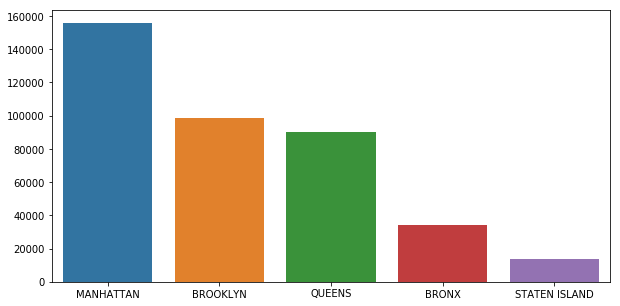

In [184]:
plt.subplots(figsize=(10,5))
sns.barplot(data.boro.value_counts().index, data.boro.value_counts().values)

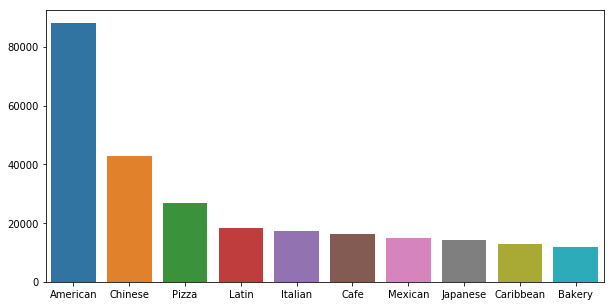

In [189]:
plt.subplots(figsize=(10,5))
sns.barplot(data.cuisine_description.value_counts().index[:10], data.cuisine_description.value_counts().values[:10])

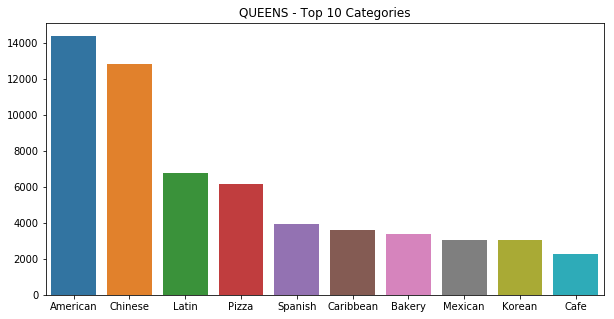

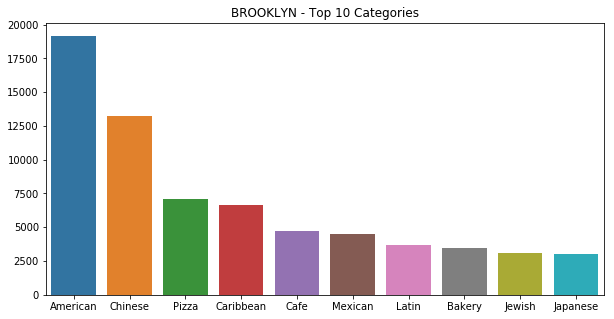

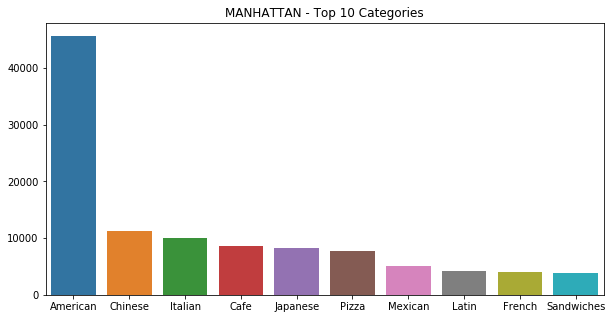

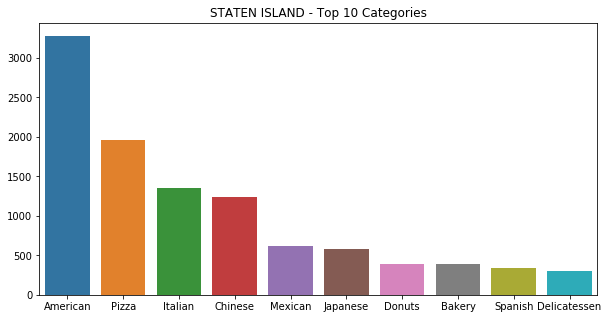

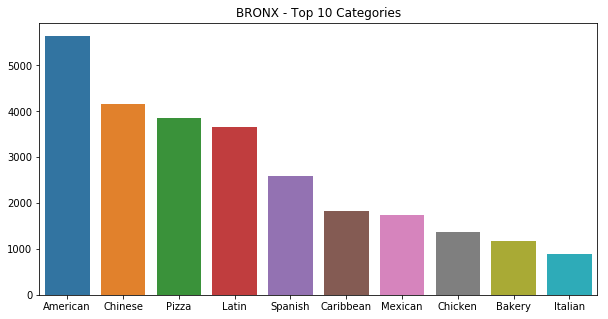

In [200]:
for b in data.boro.unique():
    plt.subplots(figsize=(10,5))
    ax = plt.axes()
    sns.barplot(data[data.boro==b].cuisine_description.value_counts().index[:10], \
                data[data.boro==b].cuisine_description.value_counts().values[:10], ax=ax)
    ax.set_title(b+' - Top 10 Categories')
    plt.show()

In [206]:
columns = ["camis","dba","boro","zipcode","cuisine_description"]

In [207]:
#Needs to be 26708 rows
restaurant_info = pd.DataFrame(data.camis.value_counts().reset_index()).rename(index=str, columns={"index":"camis","camis":"violation_count"}).merge(data[columns],how="left",on="camis").drop_duplicates().reset_index(drop=True)

In [208]:
restaurant_info.head()

,camis,violation_count,dba,boro,zipcode,cuisine_description
0,50033122,98,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,11355.0,Korean
1,40965177,94,LA GATA GOLOSA #2,QUEENS,11372.0,Bakery
2,41683816,94,MAX BAKERY & RESTAURANT,QUEENS,11372.0,Chinese
3,41510846,91,218 RESTAURANT,MANHATTAN,10013.0,Chinese
4,41289382,90,JADE ASIAN RESTAURANT,QUEENS,11354.0,Chinese


In [209]:
#Columns to add
    #total_inspections
    #total_violations
    #total_critical_violations
    #last_year_inspection_count
    #last_year_violation_count
    #last_year_critical_violations
    #last_inspection_date
    #grade

In [220]:
for c in restaurant_info.camis[:3]:
    print data[data.camis==c].sort_values(by=['grade_date'], ascending=False).iloc[0,14]

B
B
C


In [221]:
grades = list(map(lambda x: data[data.camis==x].sort_values(by=['grade_date'], ascending=False).iloc[0,14], restaurant_info.camis))

In [222]:
len(grades)

26323

In [223]:
len(restaurant_info.camis)

26323

In [224]:
grades[:10]

['B', 'B', 'C', 'Z', 'C', 'B', 'B', 'B', 'Z', 'Z']

In [226]:
restaurant_info['grade'] = grades

In [227]:
restaurant_info.head()

,camis,violation_count,dba,boro,zipcode,cuisine_description,grade
0,50033122,98,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,11355.0,Korean,B
1,40965177,94,LA GATA GOLOSA #2,QUEENS,11372.0,Bakery,B
2,41683816,94,MAX BAKERY & RESTAURANT,QUEENS,11372.0,Chinese,C
3,41510846,91,218 RESTAURANT,MANHATTAN,10013.0,Chinese,Z
4,41289382,90,JADE ASIAN RESTAURANT,QUEENS,11354.0,Chinese,C


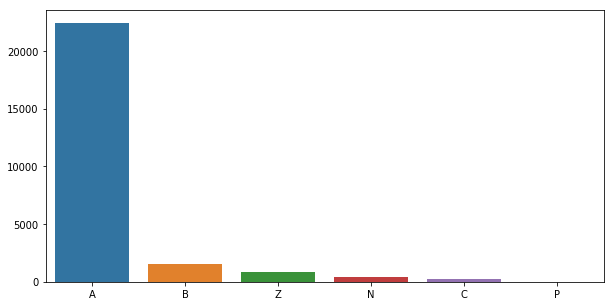

In [228]:
plt.subplots(figsize=(10,5))
sns.barplot(restaurant_info.grade.value_counts().index, restaurant_info.grade.value_counts().values)

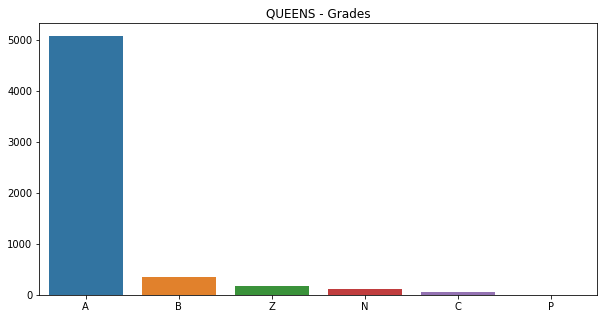

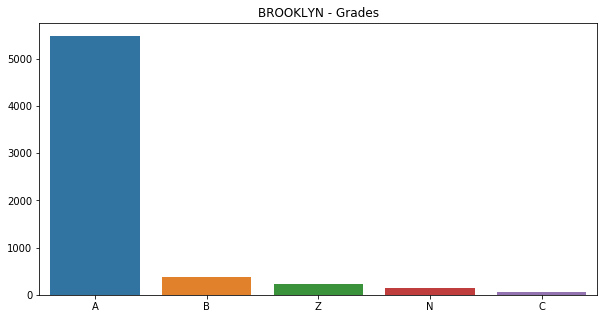

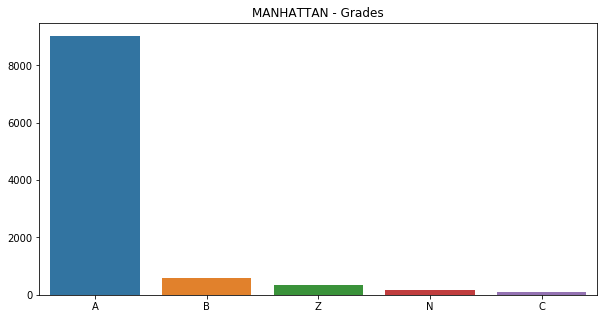

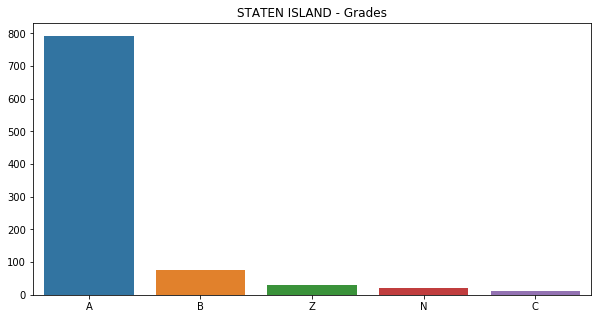

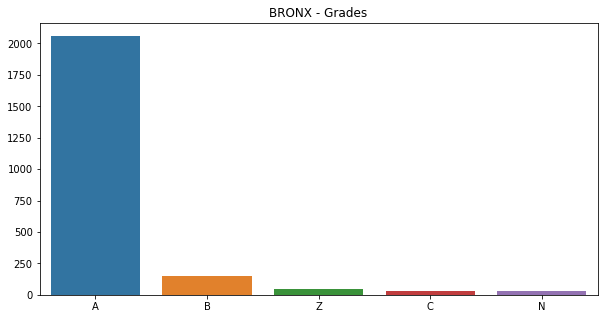

In [230]:
for b in data.boro.unique():
    plt.subplots(figsize=(10,5))
    ax = plt.axes()
    sns.barplot(restaurant_info[restaurant_info.boro==b].grade.value_counts().index, \
                restaurant_info[restaurant_info.boro==b].grade.value_counts().values, ax=ax)
    ax.set_title(b+' - Grades')
    plt.show()

# ^
# |

# Done

-------------------------------------

# WIP

In [14]:
calculated_data = pd.DataFrame(data.CAMIS.value_counts().reset_index()).rename(index=str, columns={"index":"CAMIS","CAMIS":"total_violations"})

In [15]:
calculated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 0 to 26707
Data columns (total 2 columns):
CAMIS               26708 non-null int64
total_violations    26708 non-null int64
dtypes: int64(2)
memory usage: 626.0+ KB


In [16]:
calculated_data.head()

,CAMIS,total_violations
0,50033122,98
1,40965177,94
2,41683816,94
3,41510846,91
4,41289382,90


In [12]:
len(data[(data["CAMIS"]==50033122)&(data["CRITICAL FLAG"]=="Critical")])

63

In [13]:
data[(data["CAMIS"]==50033122)&(data["CRITICAL FLAG"]=="Critical")]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
13424,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2016-02-03,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,40.0,NaN,NaT,2017-12-26,Cycle Inspection / Initial Inspection
20817,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-11-10,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,28.0,NaN,NaT,2017-12-26,Cycle Inspection / Initial Inspection
23264,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-07-09,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,32.0,C,2015-07-09,2017-12-26,Cycle Inspection / Re-inspection
35058,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-02-10,Establishment Closed by DOHMH. Violations wer...,04M,Live roaches present in facility's food and/or...,Critical,81.0,NaN,NaT,2017-12-26,Pre-permit (Operational) / Initial Inspection
37581,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-12-24,Establishment re-closed by DOHMH,04M,Live roaches present in facility's food and/or...,Critical,11.0,NaN,NaT,2017-12-26,Cycle Inspection / Reopening Inspection
47515,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-07-09,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,32.0,C,2015-07-09,2017-12-26,Cycle Inspection / Re-inspection
53147,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-07-09,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,32.0,C,2015-07-09,2017-12-26,Cycle Inspection / Re-inspection
53677,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-12-28,Establishment re-opened by DOHMH,04M,Live roaches present in facility's food and/or...,Critical,14.0,NaN,NaT,2017-12-26,Cycle Inspection / Reopening Inspection
54064,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2015-06-23,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,31.0,NaN,NaT,2017-12-26,Cycle Inspection / Initial Inspection
77648,50033122,PARTY WELL REST & ORIENTAL BAKERY,QUEENS,14932,41ST AVE,11355.0,7188860800,Korean,2016-02-17,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,B,2016-02-17,2017-12-26,Cycle Inspection / Re-inspection


In [14]:
calculated_data["total_inspections"] = [len(data[data["CAMIS"]==CAMIS]["INSPECTION DATE"].unique()) for CAMIS in calculated_data["CAMIS"]]

In [15]:
calculated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 0 to 26707
Data columns (total 3 columns):
CAMIS                26708 non-null int64
total_violations     26708 non-null int64
total_inspections    26708 non-null int64
dtypes: int64(3)
memory usage: 834.6+ KB


In [17]:
calculated_data["total_critical_violations"] = [len(data[(data["CAMIS"]==CAMIS)&(data["CRITICAL FLAG"]=="Critical")]) for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.info()

In [ ]:
calculated_data.head()

In [ ]:
len(data[(data["CAMIS"]==50033122)&(data["INSPECTION DATE"]>"8/1/2017")])

In [ ]:
data[(data["CAMIS"]==40965177)&(data["INSPECTION DATE"]>"1/1/2017")]

In [ ]:
calculated_data["last_year_violation_count"] = [len(data[(data["CAMIS"]==CAMIS)&(data["INSPECTION DATE"]>"1/1/2017")]) for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.info()

In [ ]:
calculated_data.head()

In [ ]:
calculated_data[calculated_data.last_year_violation_count==0]

In [ ]:
max(data[data["CAMIS"]==40743368]["INSPECTION DATE"])

In [ ]:
calculated_data["last_year_inspection_count"] = [len(data[(data["CAMIS"]==CAMIS)&(data["INSPECTION DATE"]>"1/1/2017")]["INSPECTION DATE"].unique()) for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.head()

In [ ]:
calculated_data.info()

In [ ]:
len(data[(data["CAMIS"]==50033122)&(data["INSPECTION DATE"]>"1/1/2017")&(data["CRITICAL FLAG"]=="Critical")]["INSPECTION DATE"].unique())

In [ ]:
calculated_data["last_year_critical_violations"] = [len(data[(data["CAMIS"]==CAMIS)&(data["INSPECTION DATE"]>"1/1/2017")&(data["CRITICAL FLAG"]=="Critical")]["INSPECTION DATE"].unique()) for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.head()

In [ ]:
calculated_data.info()

In [ ]:
calculated_data["last_inspection_date"] = [max(data[data["CAMIS"]==CAMIS]["INSPECTION DATE"]) for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.info()

In [ ]:
calculated_data.head()

In [ ]:
calculated_data.last_inspection_date.min()

In [ ]:
calculated_data[calculated_data.last_inspection_date == "1900-01-01"]

In [ ]:
grade_data = data[data.GRADE.notnull()].sort_values(by="GRADE DATE", ascending=False)

In [ ]:
[grade_data[grade_data["CAMIS"] == CAMIS]["GRADE"][:1] for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data["grade"] = [grade_data[grade_data["CAMIS"] == CAMIS]["GRADE"][:1] for CAMIS in calculated_data["CAMIS"]]

In [ ]:
calculated_data.info()

In [ ]:
calculated_data.grade.value_counts()

In [ ]:
392173
193977
26708